    Importing all the libraries needed

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
random.seed(25)
import pickle
#%matplotlib inline

    Converting matlab compatible data to python compatible
    
    import scipy.io as spio 
    mat = spio.loadmat('   .mat', squeeze_me=True)

   #### 1. Generate spikes for 10 s (or longer if you want better statistics) using a Poisson spike generator with a constant rate of 100 Hz, and record their times of occurrence. Compute the coefficient of variation of the interspike intervals, and the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms. Plot the interspike interval histogram.

    Function for spike train

In [2]:
firing_rate = 100 #Hz
time = 10000 #10s
dt = 0.001 #1ms

def spike_train(time,firing_rate,dt):
    spike = []
    interspike=[]
    k=1
    for i in range(time):
        x = random.uniform(0,1)
        if firing_rate * dt > x:
            spike.append(1)
            interspike.append(k) #appending k
            k=1
        else:
            k=k+1
            spike.append(0)
    return spike, interspike

spike, interspike =spike_train(time,firing_rate,dt)

    Function to count spike instances

In [3]:
def count_spike(spike):
    count = {x:spike.count(x) for x in spike}
    return count

count_spike(spike)

{0: 9004, 1: 996}

    Plotting spike train

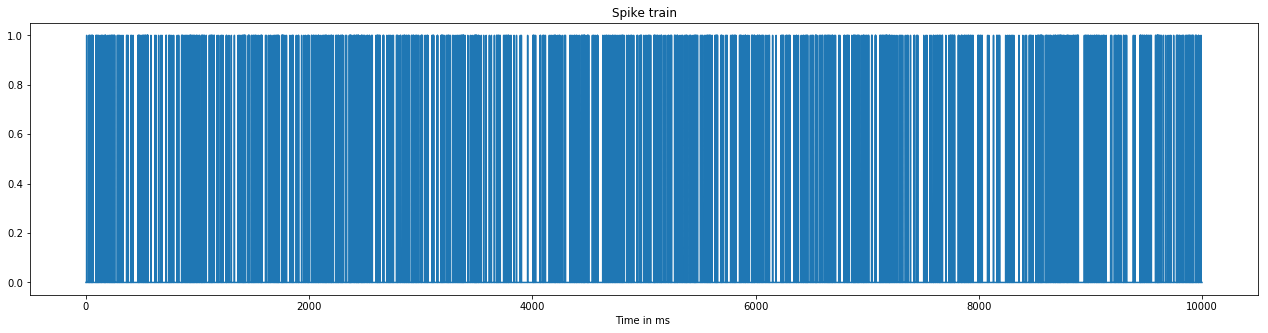

In [4]:
def spike_train_plot(spike):
    figure(num=None, figsize=(22, 5))
    d = {x:spike.count(x) for x in spike}
    plt.plot(spike)
    plt.xlabel("Time in ms ")
    plt.title("Spike train")
    
spike_train_plot(spike)

In [5]:
#100ms => 0.1s => 0.1/0.01 = 10 time steps
#spike_10 = spike[0:100]
#spike_10

### Fano factor

In [6]:

%%HTML
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e32355ea3a667f371991fa32300b27566f696e04" width="100" height="100" style="float:left">

    Fano factor takes the value 1 for a homogeneous Poisson process, independent of the time interval T.

In [7]:
spike, interspike =spike_train(time,firing_rate,dt)

def fano(spike,length):
    spike_10 = spike[0:length]
    spike_10_var = np.var(spike_10)
    spike_10_mean = np.mean(spike_10)
    Fano = spike_10_var/spike_10_mean
    return Fano

fano(spike,length = 100)

0.9100000000000004

### Coefficient of variation

In [8]:

%%HTML
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/eef81d283dbe4c44e3e98013ca35c7a4614f1d01" width="100" height="100" style="float:left">


    Coefficient of variation takes the value 1 for a homogeneous Poisson process.

In [9]:
spike, interspike =spike_train(time,firing_rate,dt)

def interspike_coef_var(interspike):
    interspike_mean = np.mean(interspike)
    interspike_SD   = np.std(interspike)
    coef_var        = interspike_SD / interspike_mean 
    return coef_var   
interspike_coef_var(interspike)

0.9478847500837447

    Function to plot interspike interval

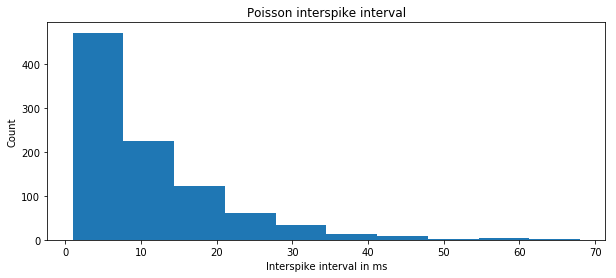

In [10]:
spike, interspike =spike_train(time,firing_rate,dt)

def interspike_hist(interspike):
    plt.figure(figsize=(10,4))
    plt.hist(interspike)
    plt.xlabel("Interspike interval in ms")
    plt.ylabel("Count")
    plt.title("Poisson interspike interval")
    plt.show()
    
interspike_hist(interspike)

  #### 2.  Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time. Initially, set the firing rate to a constant value, $r(t) = r_0$. After every spike, set $r(t)$ to 0, and then allow it to recover exponentially back to $r_0$ with a time constant $\tau_{ref}$ that controls the refractory recovery rate. In other words, have $r(t)$ obey the equation:$$\begin{equation*} \tau_{\text{ref}} \frac{d}{dt}r = r_0 - r
\end{equation*}$$
  #### except immediately after a spike, when it is set to 0. Plot the coefficient of variation as a function of $\tau_{ref}$ over the range $1ms≤ \tau_{ref} ≤20ms$, and plot interspike interval histograms for a few different values of $\tau_{ref}$ in this range. Compute the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms for the case $\tau_{ref}$=10ms.

In [11]:
#time constant
tau=10 #in ms
time = 10000 #10s in ms
dt = 0.001 #1ms
constant_firing_rate = 100 #ro value 100Hz

def spike_train_var_r(time,constant_firing_rate,dt,tau):
    k=1
    spike = []
    interspike = []
    r=constant_firing_rate

    for i in range(time):
        x=random.uniform(0,1)
    
        #find the distance from previous spike that will be your time_elsapsed
    
        time_elapsed =k
        r = constant_firing_rate - math.exp(-(time_elapsed/tau))
        
        if r*dt >x:
            #reset r to 0
            #time_elapsed = time from previous spike 
            #...present spike
            spike.append(1)
            r=0
            #r=r0 - math.exp(-(time_elapsed/tau))
            interspike.append(k)
            k=1
            
        else:
            
            k=k+1
            spike.append(0)
            
    return spike, interspike,tau
        
spike, interspike,tau = spike_train_var_r(time,constant_firing_rate,dt,tau)

In [12]:
count_spike(spike)

{0: 8989, 1: 1011}

In [13]:
fano(spike,length=100)

0.9400000000000002

In [14]:
interspike_coef_var(interspike)

0.9385545375736033

In [15]:
#tau_list = ["1","5","10","15","20"]
interspike_coef_var_tau = []
tau_list=[]
spike=[]
interspike = []
for i in range(1,20):
    
    tau_list.append(int(i))
    time = 10000 #10s in ms
    dt = 0.001 #1ms
    constant_firing_rate = 100
    
    spike, interspike,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=int(i))
    interspike_coef_var_tau.append(interspike_coef_var(interspike))

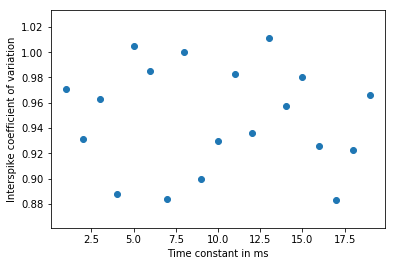

In [16]:

plt.scatter(tau_list, interspike_coef_var_tau)
plt.xlabel("Time constant in ms")
plt.ylabel("Interspike coefficient of variation")
plt.show()

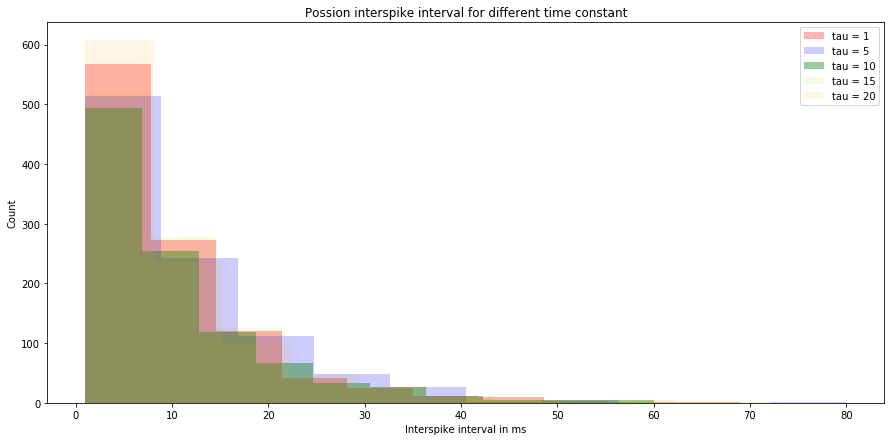

In [17]:

tau_list_hist = ["1","5","10","15","20"]
spike, interspike_1,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=1)
spike, interspike_5,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=5)
spike, interspike_10,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=10)
spike, interspike_15,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=15)
spike, interspike_20,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=20)


plt.figure(figsize=(15,7))
plt.hist(interspike_1, color='r', alpha=0.3,label='tau = 1')
plt.hist(interspike_5, color='b', alpha=0.2,label='tau = 5')
plt.hist(interspike_10, color='g', alpha=0.4,label='tau = 10')
plt.hist(interspike_15, color='y', alpha=0.1,label='tau = 15')
plt.hist(interspike_20, color='orange', alpha=0.1,label='tau = 20')


plt.legend()
plt.title('Possion interspike interval for different time constant')
plt.ylabel('Count')
plt.xlabel('Interspike interval in ms')
plt.show()


In [18]:
tau_list_hist = ["1","5","10","15","20"]
spike=[]
for i in tau_list_hist:
    
    time = 10000 #10s in ms
    dt = 0.001 #1ms
    constant_firing_rate = 100
    spike, interspike,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=int(i))

#### 3. Compute autocorrelation histograms of spike trains generated by a Poisson generator with a constant firing rate of 100 Hz, a constant firing rate of 100 Hz together with a refractory period modeled as in exercise 2 with Δref=10 ms, and a variable firing rate r(t) = 100(1 +cos(2πt / 25 ms)) Hz. Plot the histograms over a range from 0 to 100 ms.

In [19]:
#tau = 10ms
autocorrelation =[]
R = []
spike=[]

constant_firing_rate =100
spike, interspike_10,tau = spike_train_var_r(time,constant_firing_rate,dt,tau=10)
spike_100 = spike[0:100]

for t in range(100):
    R.append(100*(1 + math.cos((2*math.pi*t)/25)))

autocorrelation = np.multiply(spike_100,R)  


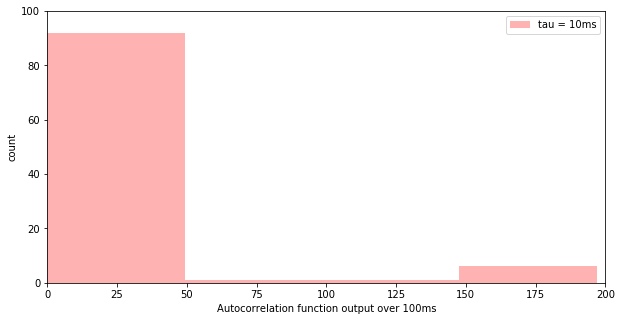

In [20]:
n=4
plt.figure(figsize=(10,5))
plt.hist(autocorrelation,n, color='r', alpha=0.3,label='tau = 10ms')
plt.legend()
plt.ylim(0,100)
plt.xlim(0,200)
plt.ylabel("count")
plt.xlabel("Autocorrelation function output over 100ms")
plt.show()



#### 4. Generate a Poisson spike train with a time-dependent firing rate r(t) =100(1+cos(2πt=300 ms)) Hz. Approximate the firing rate from this spike train using a variable rapprox that satisfies τ approx*(drapprox/dt) = -rapprox except that rapprox -> rapprox +1/τ approx every time a spike occurs. Make plots of the true rate, the spike sequence generated, and the estimated rate. Experiment with a few different values of τ approx in the range of 1 to 100 ms. Determine the best value of approx by computing the average squared error of the estimate, ∫dt(r(t) -rapprox(t))^2, for different values of τ approx, and finding the value of τ approx that minimizes this error.

{0: 888, 1: 112}


Text(0.5, 1.0, 'Spike train with approximated firing rate ')

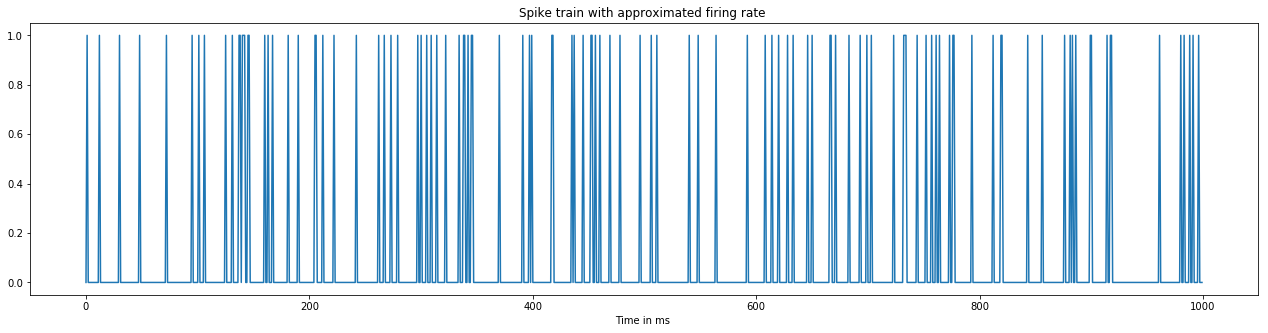

In [21]:
#time constant
tau=10 #in ms
time = 1000 #10s in ms
dt = 0.001 #1ms
spike_app = []
constant_firing_rate = 100
r_app_list = []
def spike_train_var_rapp(time,dt,tau):
    k=1
    interspike_app = []
    spike_app = []
    spike_yes = False
    
    for i in range(time):
        x=random.uniform(0,1)
        time_elapsed =k
        
        if spike_yes == True:
            r=r_app
            r_app_list.append(r)
        else:
            r = constant_firing_rate - math.exp(-(time_elapsed/tau))
            r_app_list.append(r)
        
        if r*dt >x:
            spike_app.append(1)
            #rapp = constant_firing_rate
            #r=r0 - math.exp(-(time_elapsed/tau))
            spike_yes == True
            interspike_app.append(k)
            rapp = r + (1/tau)
            k=1
        else:
            spike_yes == False
            k=k+1
            spike_app.append(0)
            
    return spike_app, interspike_app,tau, r_app_list
        
spike_app,interspike_app,tau,r_app_list = spike_train_var_rapp(time,dt,tau)
print(count_spike(spike_app))
spike_train_plot(spike_app)
plt.title("Spike train with approximated firing rate ")


{0: 889, 1: 111}


Text(0.5, 1.0, 'Spike train with cosine firing rate ')

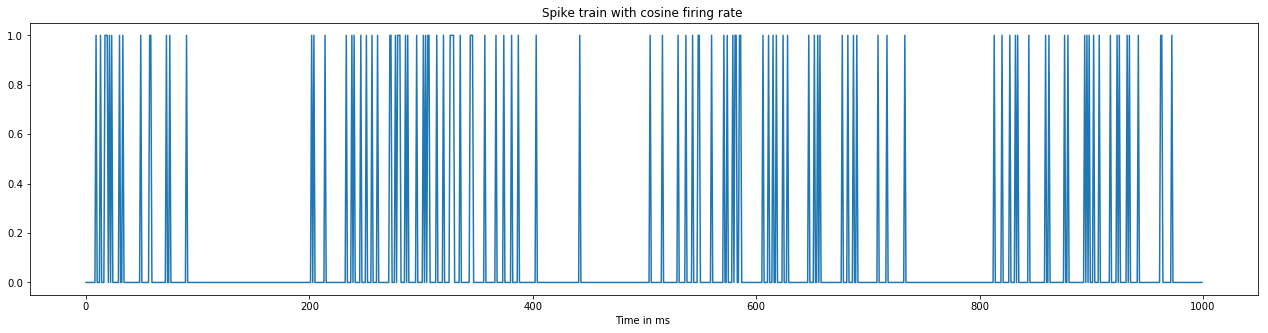

In [22]:
#time constant
tau=10 #in ms
time = 1000 #10s in ms
dt = 0.001 #1ms
spike_app = []
constant_firing_rate = 100
r_list = []
def spike_train_const_r(time,dt,tau):
    k=1
    interspike_app = []
    spike_app = []
    
    for i in range(time):
        x=random.uniform(0,1)
        t =k
        r = 100*(1 + math.cos((2*math.pi*t)/300))
        r_list.append(r)
        if r*dt >x:
            spike_app.append(1)
            interspike_app.append(k)
            k=k+1
            
        else:
            
            k=k+1
            spike_app.append(0)
            
    return spike_app, interspike_app,tau,r_list
        
spike_app,interspike_app,tau,r_list=spike_train_const_r(time,dt,tau)
print(count_spike(spike_app))
spike_train_plot(spike_app)
plt.title("Spike train with cosine firing rate ")

    Finding best τ (tau) -time constantτ (tau) 

In [23]:

#time constant
def residual():
    residual_dict = {}
    diff = 0
    time = 1000 #10s in ms
    dt = 0.001 #1ms
    spike_app = []
    constant_firing_rate = 100
    r_list = []
    for i in range(1,100):
        diff = 0
        time = 1000 #10s in ms
        dt = 0.001 #1ms
        spike_app = []
        constant_firing_rate = 100
        r_list = []
        r_app_list =[]
        
        #find R and r_approx for different tau find the one with least errror that is best tau.
        spike_app,interspike_app,tau,r_list=spike_train_const_r(time,dt,tau=10)
        spike_app,interspike_app,tau,r_app_list = spike_train_var_rapp(time,dt,tau=int(i))
        diff = np.divide( np.sum( np.square( np.subtract(r_list,r_app_list ))),1000)
        r_list = []
        r_app_list =[]
        residual_dict.update({i:diff})
    return residual_dict

In [24]:
#residual_dict[4890002.087618352]
residual_dict = residual()

#Finding minimum error
a= min(residual_dict.values())

key_list = list(residual_dict.keys())

#Finding index of minimum error - here index is time constant
val_list = list(residual_dict.values()) 

print(key_list[val_list.index(a)]) 
residual_dict=0

1


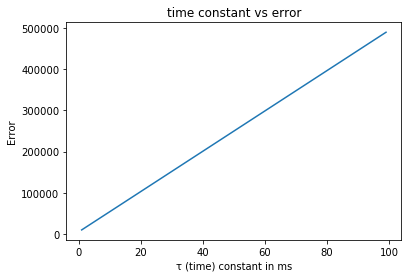

In [25]:
plt.plot(key_list,val_list)
plt.xlabel("τ (time) constant in ms")
plt.ylabel("Error")
plt.title("time constant vs error")
plt.show()

####  6. Build an approximatewhite-noise stimulus by choosing randomvalues at discrete times separated by a time-step interval Δt. Plot its autocorrelation function and power spectrum(usematlab ® function spectrum or psd). Discuss how well this stimulus matches an ideal white-noise stimulus given the value of Δt you used.

Generating normally distributed random variable using scipy.stats module's norm.rvs() method. Where loc = mean and scale = standard deviation

In [26]:
from scipy.stats import norm
# choosing sm from Gaussian distribution
data_normal = norm.rvs(size=100,loc=0,scale=2)
data_normal_1 = np.random.normal(0,2,100)

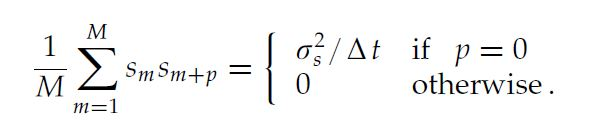

In [27]:
from IPython.display import Image
Image(filename='G:/Neuroscience/Computational Neuroscience/discrete white noise.JPG')

In [28]:
mul = []
mul_null = []
for i in range(99):
    
    product = data_normal[i]*data_normal[i+1]
    
    product_null = data_normal[i]**2 #White noise when time window is 0
    
    mul_null.append(product_null)
    
    mul.append(product)
    
    
mul_scaled = np.divide(mul,100) #Scaling by number of time bins  
mul_null_scaled = np.divide(mul_null,100)

    Verifying stimulus created with ideal white noise

In [29]:
#Stimulus autocorrelation should be 0 (close to 0)
np.sum(mul_scaled)

0.5398864402277813

In [30]:
#When time window is 0, Stimulus autocorrelation = standard deviation squarred scaled by Δt

np.sum(mul_null_scaled)

#In this case SD = 2 and Δt=1 therefore  Stimulus autocorrelation should be close to 4

4.057437494490196

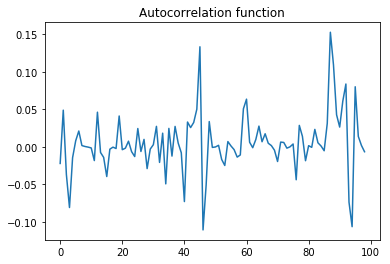

In [38]:

plt.plot(mul_scaled)
plt.title("Autocorrelation function")
plt.show() 

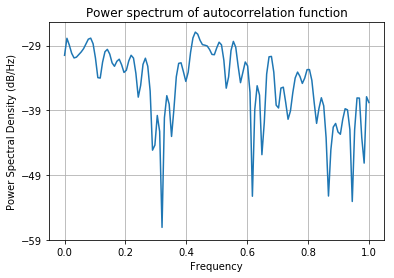

In [32]:
plt.psd(mul_scaled)
plt.title("Power spectrum of autocorrelation function")
plt.show() 

#### 8. matlab® file c1p8.mat contains data collected and provided by Rob de Ruyter van Steveninck from a fly H1 neuron responding to an approximate white-noise visual motion stimulus. Data were collected for 20minutes at a sampling rate of 500Hz. In the file, rho is a vector that gives the sequence of spiking events or non events at the sampled times (every 2 ms). When an element of rho is one, this indicates the presence of a spike at the corresponding time, whereas a zero value indicates no spike. The variable stim gives the sequence of stimulus values at the sampled times. Calculate and plot the spike-triggered average from these data over the range from 0 to 300 ms (150 time steps). (Based on a problem from Sebastian Seung.)

In [33]:

def compute_sta(stim, rho, num_timesteps):
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    
    num_spikes = len(spike_times)
    print("Total number of spikes in the dataset is",num_spikes)

    for i in range(num_spikes):
        windows = stim[(spike_times[i] - num_timesteps):spike_times[i]]
        sta = sta + windows
    sta = sta/num_spikes
    print("length= ",len(sta))
    return sta,spike_times

Total number of spikes in the dataset is 53583
length=  150


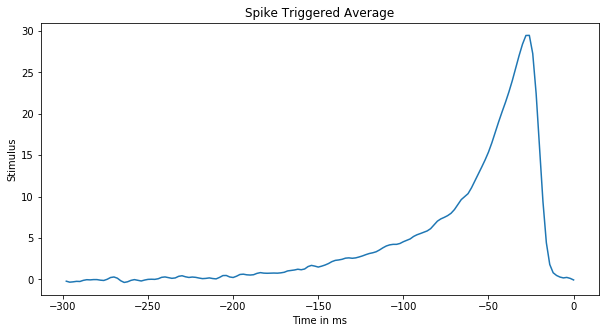

In [34]:
import matplotlib.pyplot as plt

#Loading data from local library
FILENAME = 'G:/Neuroscience/Computational Neuroscience/quiz2_code/c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
    
stim = data['stim']
rho = data['rho']
    
sampling_period = 1000/ 500 # in ms
num_timesteps = 150 #150 steps each of 2ms 

sta,spike_times = compute_sta(stim, rho, num_timesteps)

#sta = [x for x in sta if x != 0]

time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.figure(figsize=(10,5))

plt.plot(time, sta)
plt.xlabel('Time in ms')
plt.ylabel('Stimulus')
plt.title('Spike Triggered Average')

plt.show()

#### 9. Using the data of problem 8, calculate and plot stimulus averagestriggered on events consisting of a pair of spikes (which need not necessarily be adjacent) separated by a given interval (as in figure 1.10).Plot these two-spike-triggered average stimuli for various separation intervals ranging from 2 to 100 ms. (Hint: in matlab ® , use convolution for pattern matching: e.g. find( conv(rho,[101)==2)will contain the indices of all the events with two spikes separated by 4 ms.) Plot, as a function of the separation between the two spikes, the magnitude of the difference between the two-spike-triggered average and the sum of two single-spike-triggered averages (obtained 3 in exercise 8) separated by the same time interval. At what temporal separation does this difference become negligibly small. (Based on aproblem from Sebastian Seung.

Total number of spikes in the dataset is 9754
Pair of spikes seperated by interval  2


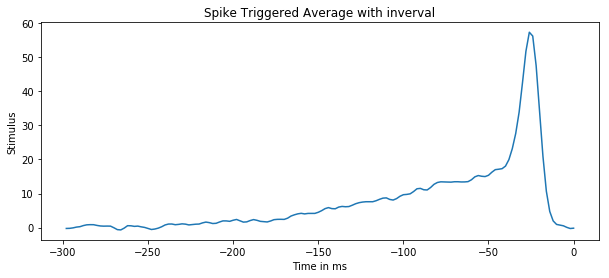

Total number of spikes in the dataset is 503
Pair of spikes seperated by interval  10


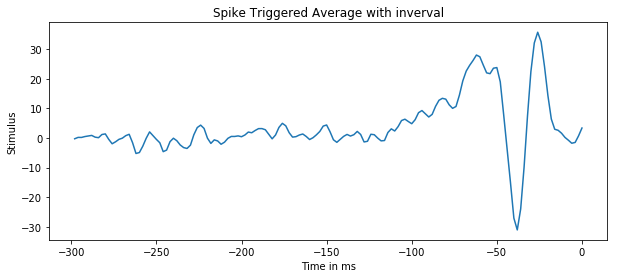

Total number of spikes in the dataset is 25
Pair of spikes seperated by interval  100


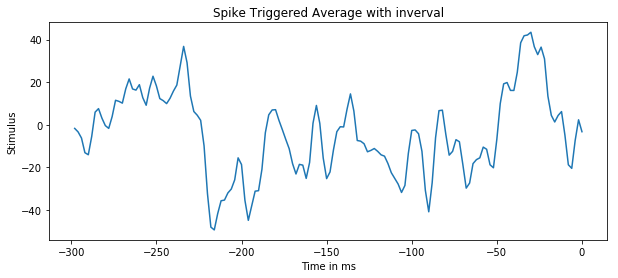

In [35]:
#Loading data from local library
FILENAME = 'G:/Neuroscience/Computational Neuroscience/quiz2_code/c1p8.pickle'
with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
    
stim = data['stim']
rho = data['rho']
    
sampling_period = 1000/ 500 # in ms
num_timesteps = 150 #150 steps each of 2ms 


def compute_sta_2ms(stim, rho, num_timesteps,interval):
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    spike_times_2 = []
    for i in range(53582):
        if spike_times[i+1]-spike_times[i]==interval:
            if spike_times[i+1] not in spike_times_2:
                spike_times_2.append(spike_times[i+1])
            
    num_spikes = len(spike_times_2)
    print("Total number of spikes in the dataset is",num_spikes)

    for i in range(num_spikes):
        windows = stim[(spike_times_2[i] - num_timesteps):spike_times_2[i]]
        sta = sta + windows
    
    sta_2 = sta/num_spikes
    
    
    return sta_2,spike_times



def plotting(stim, rho,interval,num_timesteps=150,sampling_period=2):
    
    sta_2,spike_times = compute_sta_2ms(stim, rho, num_timesteps,interval=interval)
    
    time = (np.arange(-num_timesteps, 0) + 1) * sampling_period
    print("Pair of spikes seperated by interval ", interval)
    plt.figure(figsize=(10,4))
    
    plt.plot(time, sta_2)
    plt.xlabel('Time in ms')
    plt.ylabel('Stimulus')
    plt.title('Spike Triggered Average with inverval')
    plt.show()
    


plotting(stim, rho,interval=2,num_timesteps=150,sampling_period=2)
plotting(stim, rho,interval=10,num_timesteps=150,sampling_period=2)
plotting(stim, rho,interval=100,num_timesteps=150,sampling_period=2)



#### 10. Using the data of problem 8, find the spike-triggered average stimulus for events that contain exactly two adjacent spikes separated by various different intervals ranging from 2 to 100 ms (e.g. for 4 ms,the event [1 0 1] but not the event [1 1 1]). This is distinct from exercise 9 in which we only required two spikes separated by a given interval, but did not restrict what happened between the two spikes. Compare results of the exclusive case considered here with those of the inclusive two-spike-triggered average computed in exercise 9. In what ways and why are they different? (Based on a problem from Sebastian Seung.)

In [41]:
FILENAME = 'G:/Neuroscience/Computational Neuroscience/quiz2_code/c1p8.pickle'
with open(FILENAME, 'rb') as f:
    data = pickle.load(f)
    
stim = data['stim']
rho = data['rho']
    
sampling_period = 1000/ 500 # in ms
num_timesteps = 150 #150 steps each of 2ms 

def compute_sta_101(stim, rho, num_timesteps):
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps
    spike_101 = []
    for i in range(len(rho)-2):
    
        if rho[i+2] and rho[i] == 1:
        
            if i not in spike_101:
                spike_101.append(i)
            
            if i+2 not in spike_101:   
                spike_101.append(i+2)
            
    num_spikes = len(spike_101)
    print("Total number of spikes is",num_spikes)

    for i in range(num_spikes):
        windows = stim[(spike_times[i] - num_timesteps):spike_times[i]]
        sta = sta + windows
    
    sta_3 = sta/num_spikes
    
    
    return sta_3,spike_101



In [42]:
sta_3,spike_101 =compute_sta_101(stim, rho, num_timesteps)

Total number of spikes is 16946


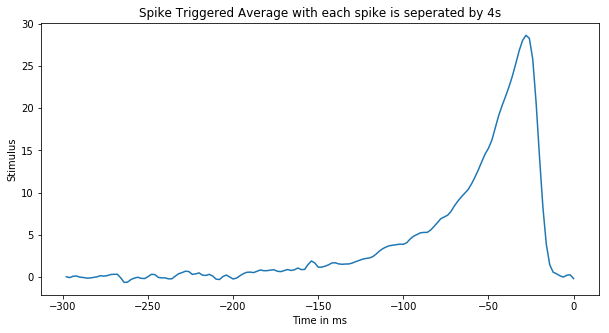

In [43]:
time = (np.arange(-num_timesteps, 0) + 1) * sampling_period

plt.figure(figsize=(10,5))

plt.plot(time, sta_3)
plt.xlabel('Time in ms')
plt.ylabel('Stimulus')
plt.title('Spike Triggered Average with each spike is seperated by 4s')

plt.show()